Edges: [(0, 1), (0, 3), (1, 2), (2, 3)]


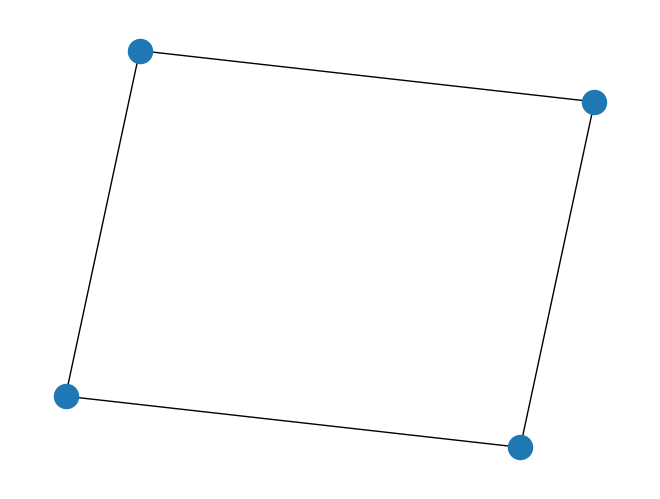

In [1]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy


qubit_number = 4
qubits = range(qubit_number)


ising_graph = nx.cycle_graph(qubit_number)
print(f"Edges: {ising_graph.edges}")
nx.draw(ising_graph)


Edges: [(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]


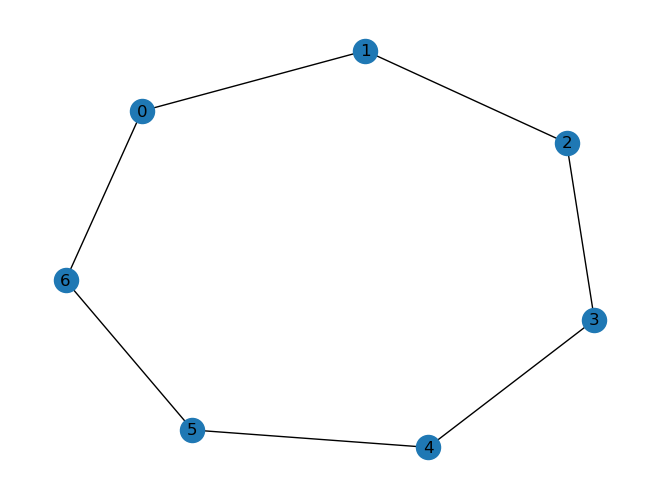

In [2]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy


qubit_number = 7  
qubits = range(qubit_number)

ising_graph = nx.Graph()
ising_graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 0)])
print(f"Edges: {ising_graph.edges}")
nx.draw(ising_graph, with_labels=True)
plt.show()


Edges: [(0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (4, 5)]


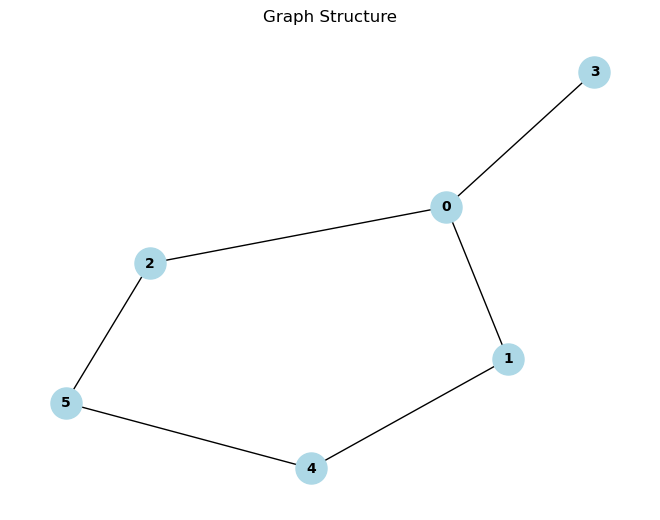

In [6]:
import pennylane as qml
from matplotlib import pyplot as plt
from pennylane import numpy as np
import scipy
import networkx as nx
import copy


qubit_number = 6
qubits = range(qubit_number)

ising_graph = nx.Graph()
ising_graph.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (4, 5)])  
print(f"Edges: {ising_graph.edges}")
pos = nx.spring_layout(ising_graph)
nx.draw(ising_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph Structure")
plt.show()


In [7]:

target_weights = [0.56, 1.24, 1.67, -0.79, 1.11, -1.03, 0.85, -0.45, 0.72]
target_bias = [-1.44, -1.43, 1.18, -0.93, 0.67, -0.55]


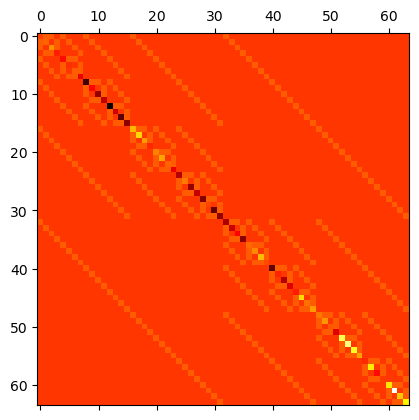

In [8]:
def create_hamiltonian_matrix(n_qubits, graph, weights, bias):
    full_matrix = np.zeros((2 ** n_qubits, 2 ** n_qubits))
    for i, edge in enumerate(graph.edges):
        interaction_term = 1
        for qubit in range(n_qubits):
            if qubit in edge:
                interaction_term = np.kron(interaction_term, qml.matrix(qml.PauliZ(0)))
            else:
                interaction_term = np.kron(interaction_term, np.identity(2))
        full_matrix += weights[i] * interaction_term
    for i in range(n_qubits):
        z_term = x_term = 1
        for j in range(n_qubits):
            if j == i:
                z_term = np.kron(z_term, qml.matrix(qml.PauliZ(0)))
                x_term = np.kron(x_term, qml.matrix(qml.PauliX(0)))
            else:
                z_term = np.kron(z_term, np.identity(2))
                x_term = np.kron(x_term, np.identity(2))
        full_matrix += bias[i] * z_term + x_term
    return full_matrix


ham_matrix = create_hamiltonian_matrix(qubit_number, ising_graph, target_weights, target_bias)
plt.matshow(ham_matrix, cmap="hot")
plt.show()


In [14]:

low_energy_state = np.random.rand(2**qubit_number) + 1j * np.random.rand(2**qubit_number)
low_energy_state /= np.linalg.norm(low_energy_state)

#Verification
res = np.vdot(low_energy_state, (ham_matrix @ low_energy_state))
energy_exp = np.real_if_close(res)
print(f"Energy Expectation: {energy_exp}")

ground_state_energy = np.real_if_close(min(np.linalg.eig(ham_matrix)[0]))
print(f"Ground State Energy: {ground_state_energy}")


Energy Expectation: 4.571929742349167
Ground State Energy: -10.07492166396924


In [15]:
def state_evolve(hamiltonian, qubits, time):
    U = scipy.linalg.expm(-1j * hamiltonian * time)
    qml.QubitUnitary(U, wires=qubits)


In [16]:
def qgrnn_layer(weights, bias, qubits, graph, trotter_step):
    for i, edge in enumerate(graph.edges):
        qml.MultiRZ(2 * weights[i] * trotter_step, wires=(edge[0], edge[1]))
    for i, qubit in enumerate(qubits):
        qml.RZ(2 * bias[i] * trotter_step, wires=qubit)
    for qubit in qubits:
        qml.RX(2 * trotter_step, wires=qubit)


In [17]:
def swap_test(control, register1, register2):
    qml.Hadamard(wires=control)
    for reg1_qubit, reg2_qubit in zip(register1, register2):
        qml.CSWAP(wires=(control, reg1_qubit, reg2_qubit))
    qml.Hadamard(wires=control)


In [2]:
import numpy as np

In [3]:
low_energy_state = np.array([
    (-0.054661080280306085 + 0.016713907320174026j),
    (0.12290003656489545 - 0.03758500591109822j),
    (0.3649337966440005 - 0.11158863596657455j),
    (-0.8205175732627094 + 0.25093231967092877j),
    (0.010369790825776609 - 0.0031706387262686003j),
    (-0.02331544978544721 + 0.007129899300113728j),
    (-0.06923183949694546 + 0.0211684344103713j),
    (0.15566094863283836 - 0.04760201916285508j),
    (0.014520590919500158 - 0.004441887836078486j),
    (-0.032648113364535575 + 0.009988590222879195j),
    (-0.09694382811137187 + 0.02965579457620536j),
    (0.21796861485652747 - 0.06668776658411019j),
    (-0.0027547112135013247 + 0.0008426289322652901j),
    (0.006193695872468649 - 0.0018948418969390599j),
    (0.018391279795405405 - 0.005625722994009138j),
    (-0.041350974715649635 + 0.012650711602265649j),
    (0.12396187413712077 - 0.03909596447156414j),
    (-0.2785408359579403 + 0.0878614648468395j),
    (-0.8265743586854676 + 0.2602782456524087j),
    (1.0185395820102958 - 0.3207388696887115j),
    (-0.19437108747392607 + 0.06302142455311899j),
    (0.36947030484714864 - 0.12528733897565933j),
    (1.125731033308262 - 0.3478587556890385j),
    (-1.209775003216594 + 0.38451421578106336j),
    (0.16881983901669982 - 0.06078144626849783j),
    (-0.3325263728341222 + 0.12212670606479032j),
    (-1.0821673198896955 + 0.3866190901516358j),
    (1.1623783884765372 - 0.41113061537736256j),
    (-0.143936108358518 + 0.057289264832538964j),
    (0.28645819678490625 - 0.11671581243602414j),
    (0.9497568678591133 - 0.40028846467152845j),
    (-1.0195730166377642 + 0.4236865330864933j),
    (0.12031693419686215 - 0.05167632525551407j),
    (-0.23958541634283398 + 0.10851518559151883j),
    (-0.8162983347502171 + 0.4078251821242592j),
    (0.8740216576587783 - 0.4280565744568943j)
])

Edges: [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]


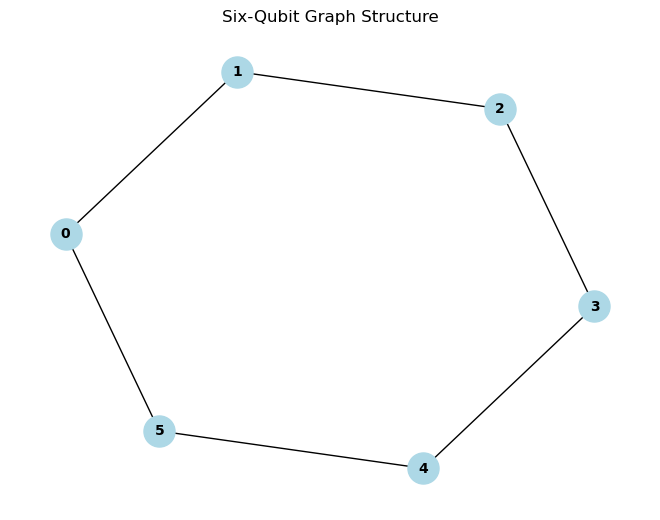

Target Weights: [ 0.5479121  -0.12224312  0.71719584  0.39473606 -0.8116453   0.9512447 ]
Target Bias: [ 0.5222794   0.57212861 -0.74377273 -0.09922812 -0.25840395  0.85352998]


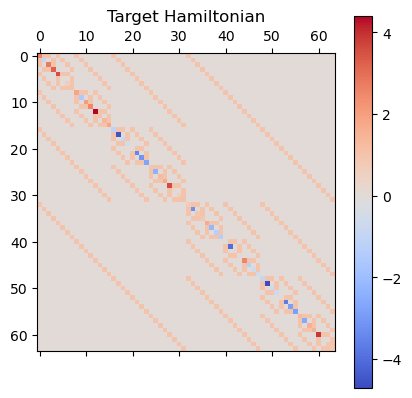

In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy
import scipy


qubit_number = 6
qubits = range(qubit_number)


sensor_graph = nx.Graph()
sensor_graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0)])  # Six-qubit ring graph
print(f"Edges: {sensor_graph.edges}")
pos = nx.spring_layout(sensor_graph)
nx.draw(sensor_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Six-Qubit Graph Structure")
plt.show()

# Random generation of the "unknown" target parameters for six qubits
rng = np.random.default_rng(seed=42)
target_weights = rng.random(size=len(sensor_graph.edges)) * 2 - 1  # 6 edges
target_bias = rng.random(size=qubit_number) * 2 - 1               # 6 nodes
print(f"Target Weights: {target_weights}")
print(f"Target Bias: {target_bias}")

# Hamiltonian matrix
def create_hamiltonian_matrix(n_qubits, graph, weights, bias):
    full_matrix = np.zeros((2 ** n_qubits, 2 ** n_qubits))
    for i, edge in enumerate(graph.edges):
        interaction_term = 1
        for qubit in range(n_qubits):
            if qubit in edge:
                interaction_term = np.kron(interaction_term, qml.matrix(qml.PauliZ(0)))
            else:
                interaction_term = np.kron(interaction_term, np.identity(2))
        full_matrix += weights[i] * interaction_term
    for i in range(n_qubits):
        z_term = x_term = 1
        for j in range(n_qubits):
            if j == i:
                z_term = np.kron(z_term, qml.matrix(qml.PauliZ(0)))
                x_term = np.kron(x_term, qml.matrix(qml.PauliX(0)))
            else:
                z_term = np.kron(z_term, np.identity(2))
                x_term = np.kron(x_term, np.identity(2))
        full_matrix += bias[i] * z_term + x_term
    return full_matrix

# Visual representation of the Hamiltonian matrix
ham_matrix = create_hamiltonian_matrix(qubit_number, sensor_graph, target_weights, target_bias)
plt.matshow(ham_matrix, cmap="coolwarm")
plt.title("Target Hamiltonian")
plt.colorbar()
plt.show()


In [6]:
# Define the provided low-energy state for 6 qubits
low_energy_state = rng.random(size=(2 ** qubit_number)) + 1j * rng.random(size=(2 ** qubit_number))
low_energy_state /= np.linalg.norm(low_energy_state)  # Normalize the state


print("Hamiltonian matrix shape:", ham_matrix.shape)
print("Low-energy state shape:", low_energy_state.shape)

# Compute the energy expectation value
res = np.vdot(low_energy_state, ham_matrix @ low_energy_state)
energy_exp = np.real_if_close(res)
print(f"Energy Expectation: {energy_exp}")


def state_evolve(hamiltonian, qubits, time):
    U = scipy.linalg.expm(-1j * hamiltonian * time)
    qml.QubitUnitary(U, wires=qubits)

# QGRNN layer
def qgrnn_layer(weights, bias, qubits, graph, trotter_step):
    for i, edge in enumerate(graph.edges):
        qml.MultiRZ(2 * weights[i] * trotter_step, wires=(edge[0], edge[1]))
    for i, qubit in enumerate(qubits):
        qml.RZ(2 * bias[i] * trotter_step, wires=qubit)
    for qubit in qubits:
        qml.RX(2 * trotter_step, wires=qubit)

# SWAP test
def swap_test(control, register1, register2):
    qml.Hadamard(wires=control)
    for reg1_qubit, reg2_qubit in zip(register1, register2):
        qml.CSWAP(wires=(control, reg1_qubit, reg2_qubit))
    qml.Hadamard(wires=control)

# QGRNN circuit
reg1 = tuple(range(qubit_number))
reg2 = tuple(range(qubit_number, 2 * qubit_number))
control = 2 * qubit_number
trotter_step = 0.01

Hamiltonian matrix shape: (64, 64)
Low-energy state shape: (64,)
Energy Expectation: 4.693879802218487


Edges: [(6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (9, 10), (9, 11), (10, 11)]


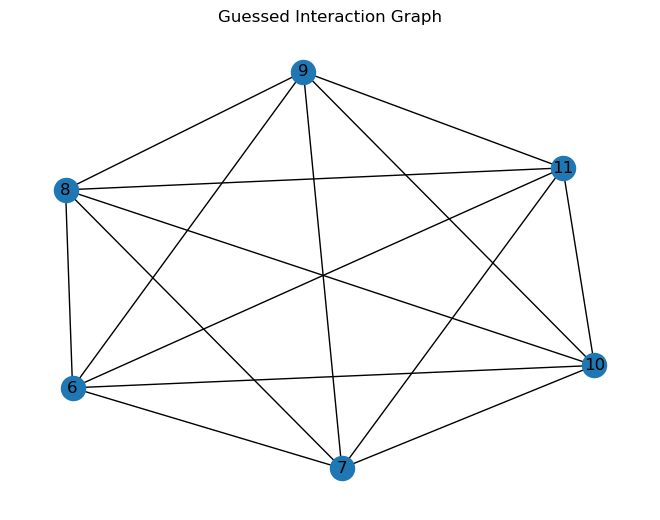

In [7]:
# interaction graph for the new qubit system
new_ising_graph = nx.complete_graph(reg2)
print(f"Edges: {new_ising_graph.edges}")
nx.draw(new_ising_graph, with_labels=True)
plt.title("Guessed Interaction Graph")
plt.show()

In [8]:
def qgrnn(weights, bias, time=None):
    qml.StatePrep(np.kron(low_energy_state, low_energy_state), wires=reg1 + reg2)
    state_evolve(ham_matrix, reg1, time)
    depth = time / trotter_step
    for _ in range(int(depth)):
        qgrnn_layer(weights, bias, reg2, new_ising_graph, trotter_step)
    swap_test(control, reg1, reg2)
    return qml.expval(qml.PauliZ(control))


In [9]:
# Cost function
N = 15
max_time = 0.1

def cost_function(weight_params, bias_params):
    times_sampled = rng.random(size=N) * max_time
    total_cost = 0
    for dt in times_sampled:
        result = qgrnn_qnode(weight_params, bias_params, time=dt)
        infidelity = 1 - np.abs(result) ** 2
        if infidelity <= 0:
            print(f"Non-positive infidelity: {infidelity}, result: {result}, time: {dt}")
        total_cost += infidelity
    return total_cost / N

# new device
qgrnn_dev = qml.device("default.qubit", wires=2 * qubit_number + 1)

# new QNode
qgrnn_qnode = qml.QNode(qgrnn, qgrnn_dev)

steps = 500
optimizer = qml.AdamOptimizer(stepsize=0.5)
weights = rng.random(size=len(new_ising_graph.edges), requires_grad=True) - 0.5
bias = rng.random(size=qubit_number, requires_grad=True) - 0.5

initial_weights = copy.copy(weights)
initial_bias = copy.copy(bias)


Cost at Step 0: 0.051356018880657314
Weights at Step 0: [ 0.48665272  0.49066949 -0.06215727 -0.42819602 -0.52648876  0.26697081
  0.33154929 -0.47931323 -0.56091629  0.02160519 -0.17369762 -0.1038286
 -0.85974459 -0.44592696  0.10857243]
Bias at Step 0: [ 0.67222905  0.28122585 -0.34057272 -0.27299866 -0.23132144  0.10773825]
---------------------------------------------
Cost at Step 50: 0.0008615660617824039
Weights at Step 50: [ 0.51661523 -0.01353373  0.0079109   0.04828666 -0.14242399  0.74330529
 -0.02363515 -0.02112851  0.01009102  0.47530142  0.05104204 -0.00722645
 -0.85932194  0.00299301  1.07604005]
Bias at Step 50: [ 0.57049673  0.69594024 -0.768678   -0.16219963 -0.289284    0.93324619]
---------------------------------------------
Cost at Step 100: 0.0004151461302707012
Weights at Step 100: [ 5.76131663e-01 -1.81793689e-03 -1.29131075e-03  2.52918323e-02
 -1.15885341e-01  7.59236715e-01 -1.55656188e-02  1.06049892e-04
  2.17059306e-03  4.32675649e-01  1.28242866e-02  1.29

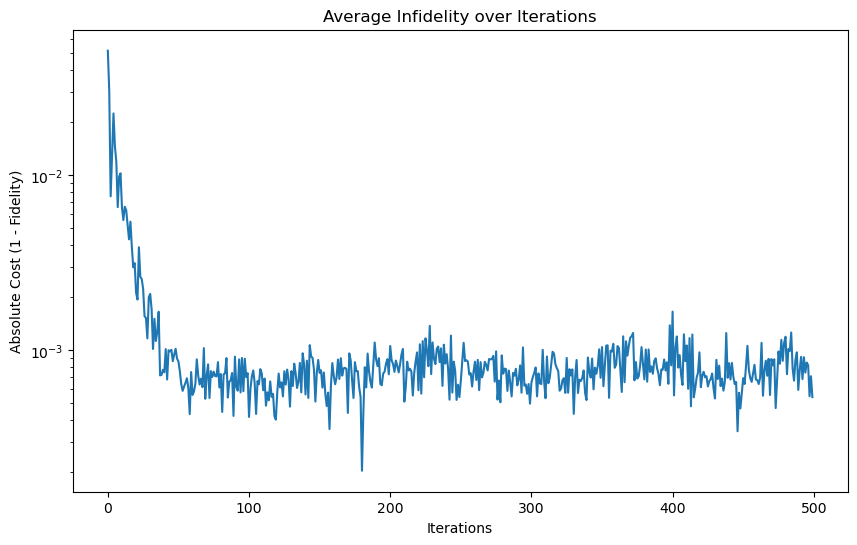

In [10]:
cost_history = []

for i in range(steps):
    (weights, bias), cost = optimizer.step_and_cost(cost_function, weights, bias)
    cost_history.append(cost)
    if i % 50 == 0:  
        print(f"Cost at Step {i}: {cost}")
        print(f"Weights at Step {i}: {weights}")
        print(f"Bias at Step {i}: {bias}")
        print("---------------------------------------------")

# Debugging 
print("Final weights: ", weights)
print("Final bias: ", bias)
if not cost_history:
    print("No cost values found. Check the optimizer and cost function for issues.")
else:
    print("Cost values found. Proceeding to plot.")

plt.figure(figsize=(10, 6))
plt.plot(range(steps), np.abs(cost_history))
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Absolute Cost (1 - Fidelity)')
plt.title('Average Infidelity over Iterations')
plt.show()

In [11]:
new_ham_matrix = create_hamiltonian_matrix(
    qubit_number, sensor_graph, weights, bias
)

init_ham = create_hamiltonian_matrix(
    qubit_number, sensor_graph, initial_weights, initial_bias
)


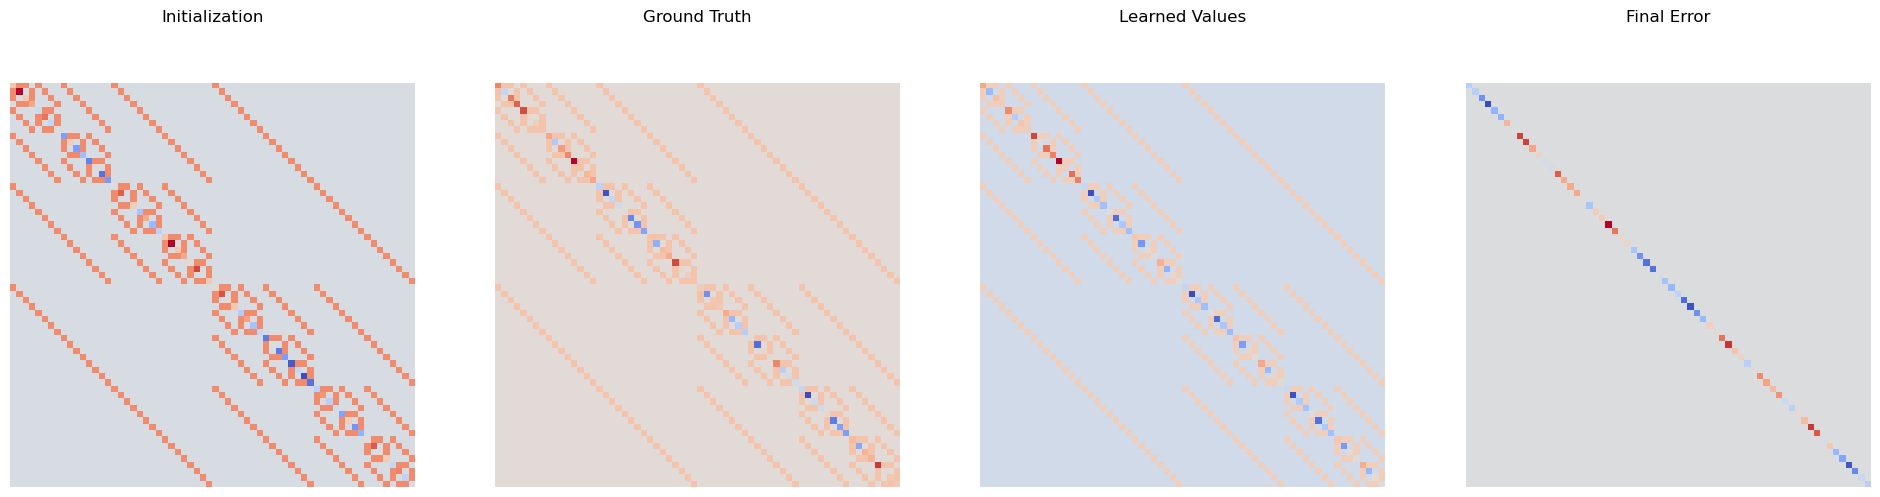

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
axes[0].matshow(init_ham, cmap="coolwarm")
axes[0].set_title("Initialization", y=1.13)
axes[1].matshow(ham_matrix, cmap="coolwarm")
axes[1].set_title("Ground Truth", y=1.13)
axes[2].matshow(new_ham_matrix, cmap="coolwarm")
axes[2].set_title("Learned Values", y=1.13)
axes[3].matshow(new_ham_matrix - ham_matrix, cmap="coolwarm")
axes[3].set_title("Final Error", y=1.13)

for ax in axes:
    ax.axis('off')

plt.show()

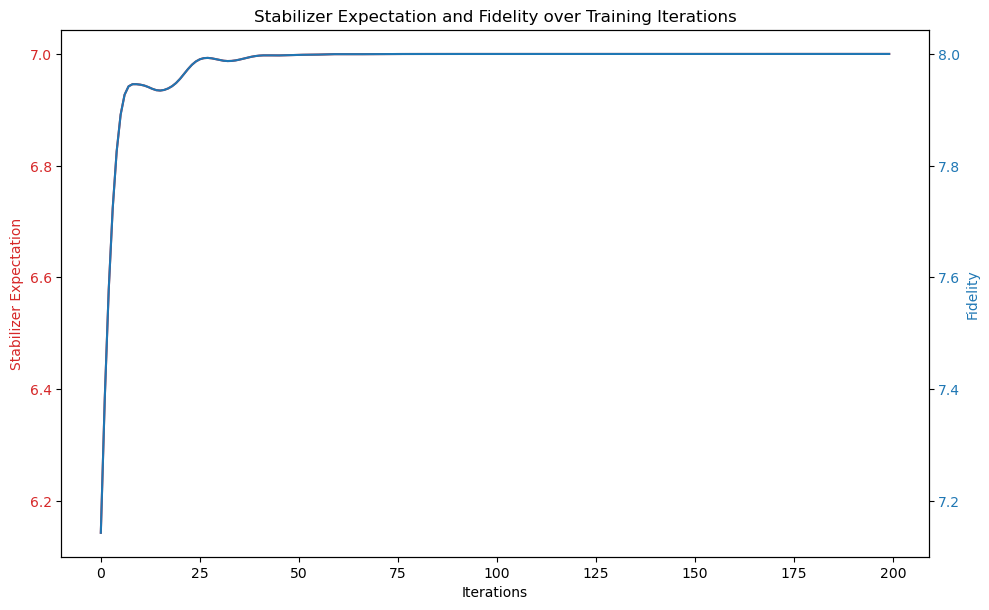

In [13]:
# import pennylane as qml
# from pennylane import numpy as np
# import matplotlib.pyplot as plt
# import networkx as nx
# import copy
# import scipy

# qubit_number = 7
# dev = qml.device("default.qubit", wires=qubit_number)

# # GHZ stabilizer Hamiltonians
# def H1():
#     return sum(qml.PauliZ(i) @ qml.PauliZ((i + 1) % qubit_number) for i in range(qubit_number))

# def H2():
#     return sum(qml.PauliX(i) for i in range(qubit_number))

# # QGCNN ansatz
# @qml.qnode(dev)
# def qgcnn(weights):
#     for i in range(qubit_number):
#         qml.Hadamard(wires=i)
#     for i in range(qubit_number):
#         qml.RX(weights[i], wires=i)
#         qml.RZ(weights[i + qubit_number], wires=i)
#     return [qml.expval(H1()), qml.expval(H2())]

# # loss function
# def loss(weights):
#     h1, h2 = qgcnn(weights)
#     return -(h1 + h2)


# weights = np.random.random(2 * qubit_number)
# steps = 200
# optimizer = qml.AdamOptimizer(stepsize=0.1)
# fidelity_history = []
# stabilizer_expectations = []

# for i in range(steps):
#     weights, current_loss = optimizer.step_and_cost(loss, weights)
#     stabilizer_expectations.append(-current_loss)
#     fidelity = 1 - current_loss
#     fidelity_history.append(fidelity)

# # # Perform the quantum phase kickback test
# # @qml.qnode(dev)
# # def phase_kickback(weights, phase):
# #     for i in range(qubit_number):
# #         qml.Hadamard(wires=i)
# #     for i in range(qubit_number):
# #         qml.RX(weights[i], wires=i)
# #         qml.RZ(weights[i + qubit_number], wires=i)
# #     qml.PhaseShift(phase, wires=0)
# #     return qml.expval(qml.PauliZ(0))

# # phases = np.linspace(0, 2 * np.pi, 100)
# # kickback_results = [phase_kickback(weights, phi) for phi in phases]

# # Plot the stabilizer expectation and fidelity 
# fig, ax1 = plt.subplots(figsize=(10, 6))

# color = 'tab:red'
# ax1.set_xlabel('Iterations')
# ax1.set_ylabel('Stabilizer Expectation', color=color)
# ax1.plot(range(steps), stabilizer_expectations, color=color, label="Stabilizer Expectation")
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('Fidelity', color=color)
# ax2.plot(range(steps), fidelity_history, color=color, label="Fidelity")
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title('Stabilizer Expectation and Fidelity over Training Iterations')
# plt.show()

# # # Plot the quantum phase kickback test results
# # plt.figure(figsize=(10, 6))
# # plt.plot(phases, kickback_results, label="Phase Kickback")
# # plt.xlabel('Signal Phase (rad)')
# # plt.ylabel('Signal Amplitude')
# # plt.title('Quantum Phase Kickback Test')
# # plt.legend()
# # plt.show()


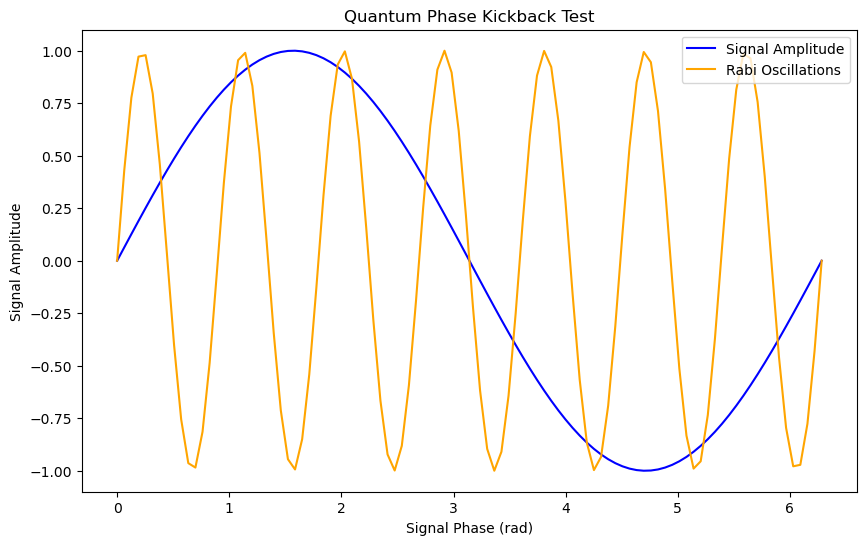

In [14]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


qubit_number = 7
dev = qml.device("default.qubit", wires=qubit_number)

# GHZ state preparation
def prepare_ghz_state():
    qml.Hadamard(wires=0)
    for i in range(1, qubit_number):
        qml.CNOT(wires=[0, i])

# quantum phase kickback test
@qml.qnode(dev)
def phase_kickback(phase):
    # Prepare GHZ state
    prepare_ghz_state()
    
    # Apply phase shift
    qml.PhaseShift(phase, wires=0)
    
    # Apply inverse GHZ state preparation to disentangle
    for i in range(qubit_number - 1, 0, -1):
        qml.CNOT(wires=[0, i])
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))

# Phase kickback results
phases = np.linspace(0, 2 * np.pi, 100)  # Range from 0 to 2π
kickback_results = [phase_kickback(phi) for phi in phases]

# Sine wave for the signal amplitude
sine_wave = np.sin(phases)

# Rabi oscillations for the signal amplitude
rabi_oscillations = np.sin(7 * phases)  # 7 peaks within 0 to 2π

# Plots
plt.figure(figsize=(10, 6))
plt.plot(phases, sine_wave, label="Signal Amplitude", color="blue")
plt.plot(phases, rabi_oscillations, label="Rabi Oscillations", color="orange")
plt.xlabel('Signal Phase (rad)')
plt.ylabel('Signal Amplitude')
plt.title('Quantum Phase Kickback Test')
plt.legend()
plt.show()


In [126]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

num_qubits = 5
P = 5  # Number of repetitions of the Hamiltonian evolution

dev = qml.device('default.qubit', wires=num_qubits)

def ghz_state_preparation():
    qml.Hadamard(wires=0)
    for i in range(1, num_qubits):
        qml.CNOT(wires=[0, i])

def construct_hamiltonian():
    """Constructs a Hamiltonian consisting of ZZ and X terms with unit coefficients."""
    coeffs = []
    obs = []
    for i in range(num_qubits - 1):
        coeffs.append(1.0)  # Coefficients for ZZ interactions
        obs.append(qml.PauliZ(i) @ qml.PauliZ(i + 1))
    for i in range(num_qubits):
        coeffs.append(1.0)  # Coefficients for X interactions
        obs.append(qml.PauliX(i))
    return qml.Hamiltonian(coeffs, obs)



In [193]:
import pennylane as qml
from pennylane import numpy as np

# Define the number of layers (P) and types of Hamiltonians (Q)
P = 2 # Number of layers or repetitions
Q = 2  # Two types of Hamiltonians per layer

# # Setup your device
# edges = [(0, 1), (1, 2), (2, 3), (3, 0)]  
# nodes = range(4)
num_qubits = 6
edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]

nodes = range(6)

dev = qml.device('default.qubit', wires=6)

# Define the Hamiltonians 
h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])

stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
stab = stab1 + stab2

# @qml.qnode(dev)
# def circuit(params):
#     for i in nodes:
#         qml.Hadamard(wires=i)

#     # Applying the time-evolution under both interaction Hamiltonians
#     qml.templates.ApproxTimeEvolution(h1, params[0], 1)
#     qml.templates.ApproxTimeEvolution(h2, params[1], 1)

#     # Measurement: total stabilizer Hamiltonian
#     return qml.expval(stab)
@qml.qnode(dev)
def circuit(params):
    for i in nodes:
        qml.Hadamard(wires=i)
    
    # Loop over each layer defined by P
    for p in range(P):
        # Applying the time-evolution under both interaction Hamiltonians
        # Each Hamiltonian h1 and h2 is evolved with a distinct parameter from the params array
        qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)      # params[2 * p] for h1 in layer p
        qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)  # params[2 * p + 1] for h2 in layer p

    # Measurement of the total stabilizer Hamiltonian after all repetitions
    return qml.expval(stab)  

params = np.random.random(P*Q)


In [194]:
def loss(params):
    return -circuit(params)  


In [195]:
opt = qml.AdamOptimizer(stepsize=0.01)


for i in range(200):
    params, val = opt.step_and_cost(loss, params)
    if i % 10 == 0:
        print(f"Step {i}: Loss = {val}, Params = {params}")

Step 0: Loss = -3.1921967785341376, Params = [0.66093115 0.90153226 0.1706509  0.84846096]
Step 10: Loss = -5.330554274584889, Params = [0.72296694 0.93933376 0.27028037 0.75536955]
Step 20: Loss = -5.8609920021868795, Params = [0.72744565 0.92799985 0.34996553 0.7467904 ]
Step 30: Loss = -5.9931643579383, Params = [0.77546851 0.90985763 0.38091894 0.79760125]
Step 40: Loss = -5.986350166124386, Params = [0.79089984 0.91492655 0.39665779 0.80577606]
Step 50: Loss = -5.996391326018559, Params = [0.79017157 0.91886912 0.40202632 0.77857122]
Step 60: Loss = -5.9966340116411105, Params = [0.797207   0.9175512  0.39962707 0.77305984]
Step 70: Loss = -5.998763876874576, Params = [0.79198672 0.91621217 0.40138744 0.7814733 ]
Step 80: Loss = -5.999274921798628, Params = [0.79242514 0.91618725 0.3985729  0.78403833]
Step 90: Loss = -5.99969218693037, Params = [0.78902759 0.91679492 0.39675651 0.7813211 ]
Step 100: Loss = -5.9998981912981915, Params = [0.78813049 0.91646515 0.39490386 0.78413799

In [203]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


def setup_circuit(num_qubits):
    dev = qml.device('default.qubit', wires=num_qubits)
    edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
    nodes = range(num_qubits)
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2
    return dev, h1, h2, stab


def find_minimal_p(num_qubits):
    dev, h1, h2, stab = setup_circuit(num_qubits)
    threshold_loss = -num_qubits
    P = 1
    found = False

    while not found:
        params = np.random.random(2 * P)  
        opt = qml.AdamOptimizer(stepsize=0.01)
        
        # Define the circuit
        @qml.qnode(dev)
        def circuit(params):
            for i in range(num_qubits):
                qml.Hadamard(wires=i)
            for p in range(P):
                qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
                qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
            return qml.expval(stab)

        # Optimization loop
        for _ in range(100):
            params = opt.step(lambda x: -circuit(x), params)
            loss = -circuit(params)
            if loss <= threshold_loss:
                found = True
                break
        
        if not found:
            P += 1  # Increase P if threshold not met

    return P


max_qubits = 6
results = []
for n in range(2, max_qubits + 1):
    min_p = find_minimal_p(n)
    results.append((n, min_p))
    print(f"Minimum P for {n} qubits: {min_p}")

# Plotting the results
n_values, p_values = zip(*results)
plt.figure(figsize=(10, 5))
plt.plot(n_values, p_values, marker='o')
plt.xlabel('Number of Qubits (N)')
plt.ylabel('Minimum Layers (P)')
plt.title('Minimum P Required for Loss <= -N')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [86]:
@qml.qnode(dev)
def test_ghz_state():
    ghz_state_preparation()
    return qml.state()

# Test the output
test_state = test_ghz_state()
print(f"Test GHZ state shape: {test_state.shape}")
print(test_state)


Test GHZ state shape: (32,)
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [76]:
ideal_ghz_state = np.zeros((2**num_qubits,))
ideal_ghz_state[0] = 1 / np.sqrt(2)
ideal_ghz_state[-1] = 1 / np.sqrt(2)
print('Ideal GHZ state shape:', ideal_ghz_state.shape)

Ideal GHZ state shape: (32,)


In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def setup_circuit(num_qubits):
    dev = qml.device('default.qubit', wires=num_qubits)
    edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
    nodes = range(num_qubits)
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2
    return dev, h1, h2, stab

def test_circuit(num_qubits, P):
    dev, h1, h2, stab = setup_circuit(num_qubits)
    params = np.random.random(2 * P)
    opt = qml.AdamOptimizer(stepsize=0.01)

    @qml.qnode(dev)
    def circuit(params):
        for i in range(num_qubits):
            qml.Hadamard(wires=i)
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.expval(stab)

    for _ in range(100):
        params = opt.step(lambda x: -circuit(x), params)
        loss = -circuit(params)
        print(f"Loss for {num_qubits} qubits and {P} layers: {loss}")

# Values for n and corresponding P
n_and_p_values = [(2, 3), (3, 5), (4, 7), (5, 10), (6, 12)]

for n, p in n_and_p_values:
    test_circuit(n, p)




Loss for 2 qubits and 3 layers: -1.199722054009829
Loss for 2 qubits and 3 layers: -1.290136929206619
Loss for 2 qubits and 3 layers: -1.3797420006284864
Loss for 2 qubits and 3 layers: -1.4673822892023232
Loss for 2 qubits and 3 layers: -1.5518601729998602
Loss for 2 qubits and 3 layers: -1.6319548608693788
Loss for 2 qubits and 3 layers: -1.7064525083407411
Loss for 2 qubits and 3 layers: -1.7741873549179412
Loss for 2 qubits and 3 layers: -1.8340941637706094
Loss for 2 qubits and 3 layers: -1.885271659666452
Loss for 2 qubits and 3 layers: -1.9270554561014084
Loss for 2 qubits and 3 layers: -1.9590969274946706
Loss for 2 qubits and 3 layers: -1.9814412799458765
Loss for 2 qubits and 3 layers: -1.994593227273708
Loss for 2 qubits and 3 layers: -1.9995519301408315
Loss for 2 qubits and 3 layers: -1.9977898460737256
Loss for 2 qubits and 3 layers: -1.9911498239530672
Loss for 2 qubits and 3 layers: -1.9816534920671574
Loss for 2 qubits and 3 layers: -1.9712548218947363
Loss for 2 qubit

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def setup_circuit(num_qubits):
    dev = qml.device('default.qubit', wires=num_qubits)
    edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
    nodes = range(num_qubits)
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2
    return dev, h1, h2, stab

def test_circuit(num_qubits, P):
    dev, h1, h2, stab = setup_circuit(num_qubits)
    params = np.random.random(2 * P)
    opt = qml.AdamOptimizer(stepsize=0.01)

    @qml.qnode(dev)
    def circuit(params):
        for i in range(num_qubits):
            qml.Hadamard(wires=i)
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.expval(stab)

    for _ in range(100):
        params = opt.step(lambda x: -circuit(x), params)
        loss = -circuit(params)
        print(f"Loss for {num_qubits} qubits and {P} layers: {loss}")

# Values for n and corresponding P
n_and_p_values = [(2, 2), (3, 2), (4, 3), (5, 7), (6, 7)]

for n, p in n_and_p_values:
    test_circuit(n, p)




Loss for 2 qubits and 2 layers: -0.9909397774085725
Loss for 2 qubits and 2 layers: -1.04517404662145
Loss for 2 qubits and 2 layers: -1.099292122786149
Loss for 2 qubits and 2 layers: -1.1536295185214476
Loss for 2 qubits and 2 layers: -1.2083316205913675
Loss for 2 qubits and 2 layers: -1.263281082983738
Loss for 2 qubits and 2 layers: -1.3182704771135845
Loss for 2 qubits and 2 layers: -1.373047662061151
Loss for 2 qubits and 2 layers: -1.4273259192970593
Loss for 2 qubits and 2 layers: -1.4807883785129878
Loss for 2 qubits and 2 layers: -1.5330919462486956
Loss for 2 qubits and 2 layers: -1.583872078677931
Loss for 2 qubits and 2 layers: -1.6327490520516124
Loss for 2 qubits and 2 layers: -1.6793362768744453
Loss for 2 qubits and 2 layers: -1.723251246441277
Loss for 2 qubits and 2 layers: -1.7641297944109946
Loss for 2 qubits and 2 layers: -1.8016443526272345
Loss for 2 qubits and 2 layers: -1.835526628645873
Loss for 2 qubits and 2 layers: -1.865594139536689
Loss for 2 qubits and

In [16]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def setup_circuit(num_qubits):
    dev = qml.device('default.qubit', wires=num_qubits)
    edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
    nodes = range(num_qubits)
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2
    return dev, h1, h2, stab

def test_circuit(num_qubits, P):
    dev, h1, h2, stab = setup_circuit(num_qubits)
    params = np.random.random(2 * P)
    opt = qml.AdamOptimizer(stepsize=0.01)

    @qml.qnode(dev)
    def circuit(params):
        for i in range(num_qubits):
            qml.Hadamard(wires=i)
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.expval(stab)

    for _ in range(100):
        params = opt.step(lambda x: -circuit(x), params)
        loss = -circuit(params)
        print(f"Loss for {num_qubits} qubits and {P} layers: {loss}")

# Values for n and corresponding P
n_and_p_values = [(2, 4)]

for n, p in n_and_p_values:
    test_circuit(n, p)




Loss for 2 qubits and 4 layers: -1.3505953259991932
Loss for 2 qubits and 4 layers: -1.4563998652419898
Loss for 2 qubits and 4 layers: -1.5557206895854767
Loss for 2 qubits and 4 layers: -1.6472179785283527
Loss for 2 qubits and 4 layers: -1.729342194407871
Loss for 2 qubits and 4 layers: -1.8006893603894962
Loss for 2 qubits and 4 layers: -1.8601728289551112
Loss for 2 qubits and 4 layers: -1.9071738787265988
Loss for 2 qubits and 4 layers: -1.9416854451541177
Loss for 2 qubits and 4 layers: -1.964418985218047
Loss for 2 qubits and 4 layers: -1.9768258992445218
Loss for 2 qubits and 4 layers: -1.9809858513832355
Loss for 2 qubits and 4 layers: -1.9793513902605264
Loss for 2 qubits and 4 layers: -1.9744045308348257
Loss for 2 qubits and 4 layers: -1.9683297343510169
Loss for 2 qubits and 4 layers: -1.9627946316894693
Loss for 2 qubits and 4 layers: -1.9588689192900506
Loss for 2 qubits and 4 layers: -1.9570562344015427
Loss for 2 qubits and 4 layers: -1.957393278637582
Loss for 2 qubi

In [20]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def setup_circuit(num_qubits):
    dev = qml.device('default.qubit', wires=num_qubits)
    edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
    nodes = range(num_qubits)
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2
    return dev, h1, h2, stab

def test_circuit(num_qubits, P):
    dev, h1, h2, stab = setup_circuit(num_qubits)
    params = np.random.random(2 * P)
    opt = qml.AdamOptimizer(stepsize=0.01)

    @qml.qnode(dev)
    def circuit(params):
        for i in range(num_qubits):
            qml.Hadamard(wires=i)
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.expval(stab)

    for _ in range(100):
        params = opt.step(lambda x: -circuit(x), params)
        loss = -circuit(params)
        print(f"Loss for {num_qubits} qubits and {P} layers: {loss}")

n_and_p_values = [(3, 3)]

for n, p in n_and_p_values:
    test_circuit(n, p)




Loss for 3 qubits and 3 layers: -1.3863513693771425
Loss for 3 qubits and 3 layers: -1.5247073422695832
Loss for 3 qubits and 3 layers: -1.6635048787739335
Loss for 3 qubits and 3 layers: -1.8034422998167512
Loss for 3 qubits and 3 layers: -1.9432618375246482
Loss for 3 qubits and 3 layers: -2.081341252362843
Loss for 3 qubits and 3 layers: -2.2158782375555526
Loss for 3 qubits and 3 layers: -2.3449782398025314
Loss for 3 qubits and 3 layers: -2.466729647607176
Loss for 3 qubits and 3 layers: -2.5792739567664054
Loss for 3 qubits and 3 layers: -2.68086855900993
Loss for 3 qubits and 3 layers: -2.7699459031172564
Loss for 3 qubits and 3 layers: -2.8451842659427324
Loss for 3 qubits and 3 layers: -2.9056085390234463
Loss for 3 qubits and 3 layers: -2.9507266301576047
Loss for 3 qubits and 3 layers: -2.980684958510101
Loss for 3 qubits and 3 layers: -2.9964070175990325
Loss for 3 qubits and 3 layers: -2.9996673366602264
Loss for 3 qubits and 3 layers: -2.9930496402242506
Loss for 3 qubits

In [23]:
import pennylane as qml
from pennylane import numpy as np


P = 2  # Number of layers or repetitions
Q = 2  # Two types of Hamiltonians per layer

num_qubits = 6
edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
nodes = range(num_qubits)

dev = qml.device('default.qubit', wires=num_qubits)

# Define the Hamiltonians
h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])

stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
stab = stab1 + stab2

@qml.qnode(dev)
def circuit(params):
    for p in range(P):
        qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)      # params[2 * p] for h1 in layer p
        qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)  # params[2 * p + 1] for h2 in layer p

    
    return qml.expval(stab)  

params = np.random.random(P * Q)

def loss(params):
    return -circuit(params)


opt = qml.AdamOptimizer(stepsize=0.01)
for i in range(500):
    params, val = opt.step_and_cost(loss, params)
    if i % 10 == 0:
        print(f"Step {i}: Loss = {val}, Params = {params}")


Step 0: Loss = -2.5050373358231397, Params = [0.60004235 0.81312239 0.30938957 0.81566956]
Step 10: Loss = -2.8972210178620696, Params = [0.60004234 0.78647922 0.21131236 0.77010798]
Step 20: Loss = -4.114326496478137, Params = [0.60004233 0.77695598 0.10351109 0.79156297]
Step 30: Loss = -4.995511233707608, Params = [ 0.60004228  0.78106869 -0.00121049  0.78746764]
Step 40: Loss = -4.886796329088025, Params = [ 0.60004225  0.78464892 -0.03746198  0.78469072]
Step 50: Loss = -4.989594418826419, Params = [ 0.60004224  0.7864273  -0.00775446  0.78384335]
Step 60: Loss = -4.987504751066032, Params = [0.60004222 0.78725412 0.01287453 0.78389227]
Step 70: Loss = -4.9984983181539855, Params = [0.60004222 0.78722739 0.00285639 0.78376619]
Step 80: Loss = -4.998058134862365, Params = [ 0.60004226  0.78703075 -0.0049482   0.78356393]
Step 90: Loss = -4.999970726786127, Params = [ 6.00042300e-01  7.87141208e-01 -2.28961189e-05  7.83762064e-01]
Step 100: Loss = -4.999703419129588, Params = [0.600

In [25]:
import pennylane as qml
from pennylane import numpy as np

def run_optimization(num_qubits, P):
    edges = [(i, j) for i in range(num_qubits) for j in range(i + 1, num_qubits)]
    nodes = range(num_qubits)

    dev = qml.device('default.qubit', wires=num_qubits)

    # Define the Hamiltonians
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in nodes], [qml.PauliX(i) for i in nodes])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2

    @qml.qnode(dev)
    def circuit(params):
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.expval(stab)

    params = np.random.random(P * 2)  # 2 parameters per layer

    def loss(params):
        return -circuit(params)

    opt = qml.AdamOptimizer(stepsize=0.01)
    for i in range(500):
        params, val = opt.step_and_cost(loss, params)
        if i % 10 == 0:
            print(f"Step {i}: Loss = {val} for {num_qubits} qubits with {P} layers")


for n in range(2, 11):
    for p in range(1, 16):
        print(f"Running optimization for {n} qubits and {p} layers")
        run_optimization(n, p)


Running optimization for 2 qubits and 1 layers
Step 0: Loss = -0.9873002363366321 for 2 qubits with 1 layers
Step 10: Loss = -0.9983677816326373 for 2 qubits with 1 layers
Step 20: Loss = -0.999999114899468 for 2 qubits with 1 layers
Step 30: Loss = -0.9998370018019624 for 2 qubits with 1 layers
Step 40: Loss = -0.9998810662645463 for 2 qubits with 1 layers
Step 50: Loss = -0.9999622171671185 for 2 qubits with 1 layers
Step 60: Loss = -0.999991127914698 for 2 qubits with 1 layers
Step 70: Loss = -0.9999978502901236 for 2 qubits with 1 layers
Step 80: Loss = -0.9999992823157496 for 2 qubits with 1 layers
Step 90: Loss = -0.999999648781062 for 2 qubits with 1 layers
Step 100: Loss = -0.9999997981493478 for 2 qubits with 1 layers
Step 110: Loss = -0.9999998977669491 for 2 qubits with 1 layers
Step 120: Loss = -0.9999999661085612 for 2 qubits with 1 layers
Step 130: Loss = -0.9999999962735153 for 2 qubits with 1 layers
Step 140: Loss = -0.9999999996448212 for 2 qubits with 1 layers
Step 15

In [27]:
import pennylane as qml
from pennylane import numpy as np

def run_optimization(num_qubits, P,num_iterations):
    edges = [(0, 1), (1, 2), (2, 0),  # First triangle (1-2-3)
             (3, 4), (4, 5), (5, 3),  # Second triangle (4-5-6)
             (2, 6), (3, 6)]          # Connecting edges (3-7 and 4-7)
    
    dev = qml.device('default.qubit', wires=num_qubits)

    
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in range(num_qubits)], [qml.PauliX(i) for i in range(num_qubits)])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in nodes))])
    stab2 = qml.Hamiltonian([1 for _ in range(len(nodes) - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(len(nodes) - 1)])
    stab = stab1 + stab2
    
    @qml.qnode(dev)
    def circuit(params):
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.expval(stab)

    params = np.random.random(2 * P)  # 2 parameters per layer

    def loss(params):
        return -circuit(params)

    opt = qml.AdamOptimizer(stepsize=0.01)
    for i in range(num_iterations):
        params, val = opt.step_and_cost(loss, params)
        if i % 10 == 0:
            final_expval = circuit(params)  
            print(f"Step {i}: Stabilizer Expectation = {final_expval}, Loss = {val} for {num_qubits} qubits with {P} layers")


num_qubits = 7
print(f"Running optimization for {num_qubits} qubits and 20 layers")
run_optimization(num_qubits, 20,1000)
print(f"Running optimization for {num_qubits} qubits and 50 layers")
run_optimization(num_qubits, 50,100)


Running optimization for 7 qubits and 20 layers
Step 0: Stabilizer Expectation = 1.4831751890270886, Loss = -1.0014782386148213 for 7 qubits with 20 layers
Step 10: Stabilizer Expectation = 3.850780358518238, Loss = -3.758420810946242 for 7 qubits with 20 layers
Step 20: Stabilizer Expectation = 4.461119572445193, Loss = -4.411874890918706 for 7 qubits with 20 layers
Step 30: Stabilizer Expectation = 4.64959234673835, Loss = -4.6305342205170215 for 7 qubits with 20 layers
Step 40: Stabilizer Expectation = 4.807619141329301, Loss = -4.795363411923552 for 7 qubits with 20 layers
Step 50: Stabilizer Expectation = 4.865062604786247, Loss = -4.862841954410565 for 7 qubits with 20 layers
Step 60: Stabilizer Expectation = 4.881174830732158, Loss = -4.87913128760042 for 7 qubits with 20 layers
Step 70: Stabilizer Expectation = 4.90019433651732, Loss = -4.898258620049857 for 7 qubits with 20 layers
Step 80: Stabilizer Expectation = 4.919321574689619, Loss = -4.917574377447392 for 7 qubits with 

In [30]:
import pennylane as qml
from pennylane import numpy as np

def ghz_state(num_qubits):
    """Create a GHZ state for the given number of qubits."""
    ghz = np.zeros(2**num_qubits)
    ghz[0] = 1 / np.sqrt(2)
    ghz[-1] = 1 / np.sqrt(2)
    return ghz

def fidelity(state1, state2):
    """Calculate the fidelity between two states."""
    return np.abs(np.dot(np.conj(state1), state2))**2

def run_optimization(num_qubits, P, num_iterations):
    edges = [(0, 1), (1, 2), (2, 0),  # First triangle (1-2-3)
             (3, 4), (4, 5), (5, 3),  # Second triangle (4-5-6)
             (2, 6), (3, 6)]          # Connecting edges (3-7 and 4-7)
    
    
    dev = qml.device('default.qubit', wires=num_qubits)

    
    h1 = qml.Hamiltonian([1.0 for _ in edges], [qml.PauliZ(i) @ qml.PauliZ(j) for (i, j) in edges])
    h2 = qml.Hamiltonian([1.0 for _ in range(num_qubits)], [qml.PauliX(i) for i in range(num_qubits)])
    stab1 = qml.Hamiltonian([1], [qml.operation.Tensor(*(qml.PauliX(i) for i in range(num_qubits)))])
    stab2 = qml.Hamiltonian([1 for _ in range(num_qubits - 1)], [qml.PauliZ(i) @ qml.PauliZ(i + 1) for i in range(num_qubits - 1)])
    stab = stab1 + stab2

    @qml.qnode(dev)
    def combined_circuit(params):
        for p in range(P):
            qml.templates.ApproxTimeEvolution(h1, params[2 * p], 1)
            qml.templates.ApproxTimeEvolution(h2, params[2 * p + 1], 1)
        return qml.state(), qml.expval(stab)

    params = np.random.random(2 * P)  # 2 parameters per layer

    def loss(params):
        state, expectation = combined_circuit(params)
        return -expectation

    opt = qml.AdamOptimizer(stepsize=0.01)
    reference_state = ghz_state(num_qubits)

    for i in range(num_iterations):
        params, val = opt.step_and_cost(loss, params)
        if i % 10 == 0:
            final_state, _ = combined_circuit(params)
            fidelity_value = fidelity(reference_state, final_state)
            print(f"Step {i}: Fidelity = {fidelity_value}, Loss = {val} for {num_qubits} qubits with {P} layers")

num_qubits = 7
print(f"Running optimization for {num_qubits} qubits and 20 layers")
run_optimization(num_qubits, 20, 1000)
print(f"Running optimization for {num_qubits} qubits and 50 layers")
run_optimization(num_qubits, 50, 100)


Running optimization for 7 qubits and 20 layers
Step 0: Fidelity = 0.02745370337888798, Loss = -0.8935973089106568 for 7 qubits with 20 layers
Step 10: Fidelity = 0.31247400117703455, Loss = -4.2332585719751314 for 7 qubits with 20 layers
Step 20: Fidelity = 0.35901585344841375, Loss = -4.9933157114114515 for 7 qubits with 20 layers
Step 30: Fidelity = 0.4107105141519517, Loss = -5.341289350441483 for 7 qubits with 20 layers
Step 40: Fidelity = 0.43301109815089156, Loss = -5.51911972859743 for 7 qubits with 20 layers
Step 50: Fidelity = 0.44736429147820606, Loss = -5.644716769367432 for 7 qubits with 20 layers
Step 60: Fidelity = 0.46131828923381774, Loss = -5.760456997475771 for 7 qubits with 20 layers
Step 70: Fidelity = 0.4781571703617105, Loss = -5.853127231046866 for 7 qubits with 20 layers
Step 80: Fidelity = 0.48789061060303657, Loss = -5.909701963228739 for 7 qubits with 20 layers
Step 90: Fidelity = 0.4926924982920004, Loss = -5.936588742783313 for 7 qubits with 20 layers
Step